<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 200 width=200 alt=" ">  



|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|17 de junio 2020|

# Sistema de recomendación  
**Descripción:** Programa realizado en python  de  recomiendación de Películas en base a su Ranking

## Contenido   

1. [Librerias](#Librerias-a-utilizar)
1. [Carga de los datos](#Cargar-los-datos)
1. [Verificar los datos](#verificar-los-datos)
1. [Preparar los datos](#Preparar-los-datos)
1. [Vectorizar los datos](#vectorizar-los-datos)
1. [Matrix de similitud](#Matrix-del-coseno-de-similaridad)
1. [Recomendación en base a su Ranking](#Recomendacion)

### Librerias a utilizar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

###  Cargar los datos
[IMDB-Movie-Data.csv](https://www.kaggle.com/PromptCloudHQ/imdb-data)

In [2]:
movie = pd.read_csv('IMDB-Movie-Data.csv')
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### verificar los datos
1. [x] su dimensión
1. [x] Si hay datos Nulos

In [3]:
movie.shape

(1000, 12)

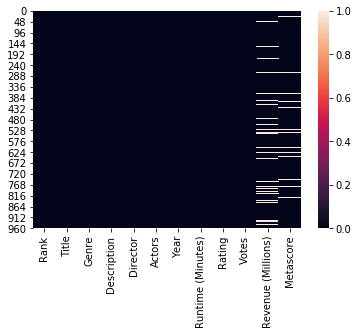

In [4]:
sns.heatmap(movie.isnull())

### Preparar los datos  
1. [ ] seleccionar columnas importantes
1. [ ] Concatenar los datos de las columnas importantes

In [5]:
columnas = ['Actors', 'Director',  'Genre', 'Title' ]
movie['important_features'] = movie.Actors + "  "+ movie.Director + " "+ movie.Genre + " "+ movie.Title
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,important_features
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


### vectorizar los datos

In [6]:
cm = CountVectorizer().fit_transform(movie.important_features)

### Matrix del coseno de similaridad

In [7]:
cs = cosine_similarity(cm)

In [8]:
cs.shape

(1000, 1000)

### Recomendacion

In [9]:
title = 'Prometheus'
# buscar el id_de la pelicula....

#  Realizamos en base al Ranking ya que este dataset no tiene id
movie_rank= movie[movie.Title == title]['Rank'].values[0]

In [11]:
scores = list(enumerate(cs[movie_rank]))

In [12]:
# ordenar la lista por la similiridad del score
sorted_scores = sorted(scores, key = lambda x: x[1], reverse=True)

In [13]:
#filtar para no seleccionar el titulo en si ya que tendra 100%
sorted_scores = sorted_scores[1: ]

In [16]:
# imprimir la lista de las 7 peliculas que tienen la misma similitud
j = 0
for item in sorted_scores:
    movie_title = movie[movie.Rank==item[0]]["Title"].values[0]
    print(j+1, movie_title)
    j = j + 1 
    if j>6:
        break

1 Spotlight
2 The Amazing Spider-Man 2
3 The Stakelander
4 The Last Witch Hunter
5 Bridget Jones's Baby
6 Solace
7 Turbo Kid
